In [ ]:
import torch as th
import pandas as pd
import torchvision.datasets
import torchvision.models as models
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torch.nn as nn
from torch.optim import Adam
import  numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("Ecoline-2021-09_2022-03-10.csv", sep=";")

In [ ]:
data

,SeriesName,ImageFileName,FractionId,FractionName,Points,Question,Answer,AllPhotoSegmentsClassified,AllPhotoSegmentsVerified
0,Ecoline-2021-09,53b812a205144b49ba0d173b4fb49b64.raw,1,Фракция,"[{""X"":968,""Y"":607},{""X"":938,""Y"":609},{""X"":906,...",Что это?,Ничего из вышеперечисленного,True,False
1,Ecoline-2021-09,53b812a205144b49ba0d173b4fb49b64.raw,1,Фракция,"[{""X"":924,""Y"":398},{""X"":913,""Y"":425},{""X"":913,...",Что это?,ПЭТ коричневый,True,False
2,Ecoline-2021-09,53b812a205144b49ba0d173b4fb49b64.raw,1,Фракция,"[{""X"":1100,""Y"":561},{""X"":1079,""Y"":550},{""X"":10...",Что это?,ПЭТ прозрачный,True,False
3,Ecoline-2021-09,53b812a205144b49ba0d173b4fb49b64.raw,1,Фракция,"[{""X"":978,""Y"":684},{""X"":965,""Y"":677},{""X"":948,...",Что это?,ПЭТ зеленый,True,False
4,Ecoline-2021-09,53b812a205144b49ba0d173b4fb49b64.raw,1,Фракция,"[{""X"":1015,""Y"":787},{""X"":947,""Y"":768},{""X"":893...",Что это?,ПЭТ прозрачный,True,False
...,...,...,...,...,...,...,...,...,...
12030,Ecoline-2021-09,81f99790c0f54011bbdc75203aa2edf7.raw,1,Фракция,"[{""X"":329,""Y"":0},{""X"":358,""Y"":49},{""X"":460,""Y""...",Что это?,ПЭТ прозрачный,True,False
12031,Ecoline-2021-09,81f99790c0f54011bbdc75203aa2edf7.raw,1,Фракция,"[{""X"":287,""Y"":9},{""X"":247,""Y"":44},{""X"":209,""Y""...",Что это?,Ничего из вышеперечисленного,True,False
12032,Ecoline-2021-09,81f99790c0f54011bbdc75203aa2edf7.raw,1,Фракция,"[{""X"":213,""Y"":720},{""X"":316,""Y"":785},{""X"":369,...",Что это?,NaN,True,False
12033,Ecoline-2021-09,81f99790c0f54011bbdc75203aa2edf7.raw,1,Фракция,"[{""X"":258,""Y"":89},{""X"":300,""Y"":84},{""X"":480,""Y...",Что это?,Ничего из вышеперечисленного,True,False


In [ ]:
import seaborn as sns

In [ ]:
data['Answer'].unique()

array(['Ничего из вышеперечисленного', 'ПЭТ коричневый', 'ПЭТ прозрачный',
       'ПЭТ зеленый', nan, 'ПЭТ масло', 'ПЭТ молочка (белая/прозрачная)',
       'ПЭТ голубой', 'Одноразовая посуда (пластик)',
       'Любая бутылка с термоусадкой', 'Бутылка Бытовая химия',
       'Черные металлы', 'Пленка (пакеты/стретч) белая/прозрачная',
       'Тэтрапак', 'ПЭТ бирюзовый', 'Пленка (пакеты/стретч) цветная',
       'ПЭТ остальные цвета', 'Алюминий'], dtype=object)

In [ ]:
data['Points']

0        [{"X":968,"Y":607},{"X":938,"Y":609},{"X":906,...
1        [{"X":924,"Y":398},{"X":913,"Y":425},{"X":913,...
2        [{"X":1100,"Y":561},{"X":1079,"Y":550},{"X":10...
3        [{"X":978,"Y":684},{"X":965,"Y":677},{"X":948,...
4        [{"X":1015,"Y":787},{"X":947,"Y":768},{"X":893...
                               ...                        
12030    [{"X":329,"Y":0},{"X":358,"Y":49},{"X":460,"Y"...
12031    [{"X":287,"Y":9},{"X":247,"Y":44},{"X":209,"Y"...
12032    [{"X":213,"Y":720},{"X":316,"Y":785},{"X":369,...
12033    [{"X":258,"Y":89},{"X":300,"Y":84},{"X":480,"Y...
12034    [{"X":1198,"Y":87},{"X":1203,"Y":156},{"X":115...
Name: Points, Length: 12035, dtype: object

In [ ]:
data = data.drop(columns=["FractionId"])
data = data.drop(columns=["FractionName"])
data = data.drop(columns=["SeriesName"])
data = data.drop(columns=["AllPhotoSegmentsClassified"])
data = data.drop(columns=["Question"])

In [ ]:
data.head(1000)

,ImageFileName,Points,Answer,AllPhotoSegmentsVerified
0,53b812a205144b49ba0d173b4fb49b64.raw,"[{""X"":968,""Y"":607},{""X"":938,""Y"":609},{""X"":906,...",Ничего из вышеперечисленного,False
1,53b812a205144b49ba0d173b4fb49b64.raw,"[{""X"":924,""Y"":398},{""X"":913,""Y"":425},{""X"":913,...",ПЭТ коричневый,False
2,53b812a205144b49ba0d173b4fb49b64.raw,"[{""X"":1100,""Y"":561},{""X"":1079,""Y"":550},{""X"":10...",ПЭТ прозрачный,False
3,53b812a205144b49ba0d173b4fb49b64.raw,"[{""X"":978,""Y"":684},{""X"":965,""Y"":677},{""X"":948,...",ПЭТ зеленый,False
4,53b812a205144b49ba0d173b4fb49b64.raw,"[{""X"":1015,""Y"":787},{""X"":947,""Y"":768},{""X"":893...",ПЭТ прозрачный,False
...,...,...,...,...
995,1526281e1c3d4c829228aeedac81a165.raw,"[{""X"":881,""Y"":255},{""X"":841,""Y"":250},{""X"":824,...",Одноразовая посуда (пластик),True
996,1526281e1c3d4c829228aeedac81a165.raw,"[{""X"":785,""Y"":2},{""X"":771,""Y"":29},{""X"":765,""Y""...",ПЭТ зеленый,True
997,1526281e1c3d4c829228aeedac81a165.raw,"[{""X"":732,""Y"":317},{""X"":682,""Y"":352},{""X"":620,...",ПЭТ прозрачный,True
998,1526281e1c3d4c829228aeedac81a165.raw,"[{""X"":428,""Y"":497},{""X"":408,""Y"":498},{""X"":400,...",ПЭТ коричневый,True


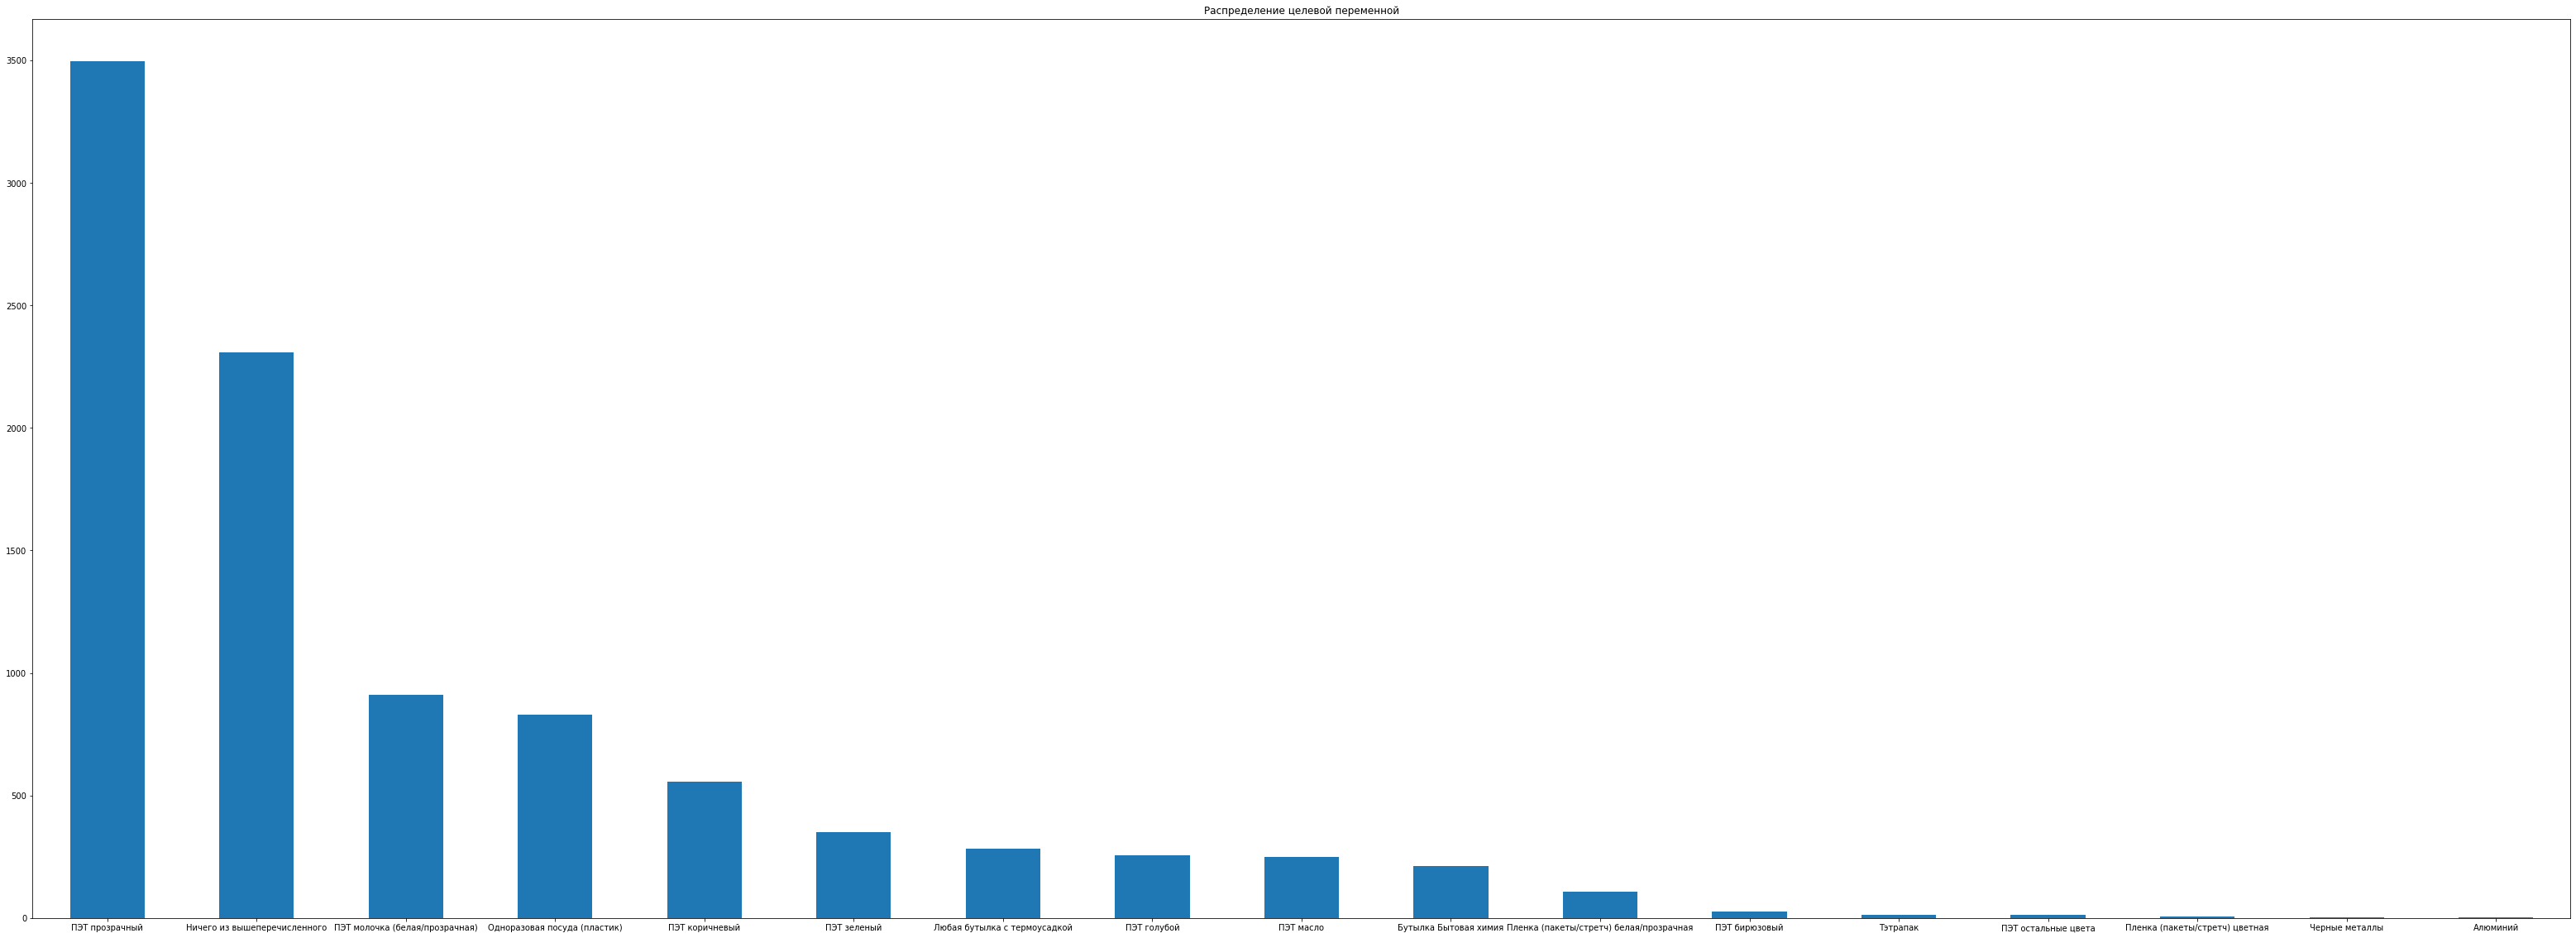

In [ ]:
data['Answer'].value_counts().plot.bar(figsize = (55,20))
plt.xticks(rotation=0)
plt.title('Распределение целевой переменной')
plt.show()

In [ ]:
x = data[['Points']]
# x = x.reshape((12035, 1))

In [ ]:
x

,Points
0,"[{""X"":968,""Y"":607},{""X"":938,""Y"":609},{""X"":906,..."
1,"[{""X"":924,""Y"":398},{""X"":913,""Y"":425},{""X"":913,..."
2,"[{""X"":1100,""Y"":561},{""X"":1079,""Y"":550},{""X"":10..."
3,"[{""X"":978,""Y"":684},{""X"":965,""Y"":677},{""X"":948,..."
4,"[{""X"":1015,""Y"":787},{""X"":947,""Y"":768},{""X"":893..."
...,...
12030,"[{""X"":329,""Y"":0},{""X"":358,""Y"":49},{""X"":460,""Y""..."
12031,"[{""X"":287,""Y"":9},{""X"":247,""Y"":44},{""X"":209,""Y""..."
12032,"[{""X"":213,""Y"":720},{""X"":316,""Y"":785},{""X"":369,..."
12033,"[{""X"":258,""Y"":89},{""X"":300,""Y"":84},{""X"":480,""Y..."


In [ ]:
y = data['Points']

In [ ]:
y = np.array(y)

In [ ]:
y

array(['[{"X":968,"Y":607},{"X":938,"Y":609},{"X":906,"Y":603},{"X":886,"Y":595},{"X":869,"Y":577},{"X":844,"Y":567},{"X":833,"Y":561},{"X":812,"Y":580},{"X":796,"Y":605},{"X":775,"Y":639},{"X":771,"Y":657},{"X":776,"Y":669},{"X":788,"Y":679},{"X":807,"Y":687},{"X":826,"Y":694},{"X":859,"Y":707},{"X":896,"Y":691},{"X":920,"Y":662},{"X":929,"Y":640},{"X":959,"Y":623}]',
       '[{"X":924,"Y":398},{"X":913,"Y":425},{"X":913,"Y":442},{"X":920,"Y":454},{"X":941,"Y":461},{"X":958,"Y":461},{"X":974,"Y":463},{"X":997,"Y":473},{"X":1022,"Y":480},{"X":1045,"Y":496},{"X":1060,"Y":513},{"X":1062,"Y":530},{"X":1081,"Y":545},{"X":1098,"Y":551},{"X":1114,"Y":566},{"X":1127,"Y":566},{"X":1140,"Y":583},{"X":1149,"Y":596},{"X":1171,"Y":596},{"X":1183,"Y":588},{"X":1194,"Y":593},{"X":1203,"Y":599},{"X":1224,"Y":604},{"X":1241,"Y":612},{"X":1255,"Y":619},{"X":1265,"Y":624},{"X":1287,"Y":624},{"X":1304,"Y":630},{"X":1321,"Y":636},{"X":1340,"Y":639},{"X":1352,"Y":644},{"X":1366,"Y":649},{"X":1373,"Y":647},

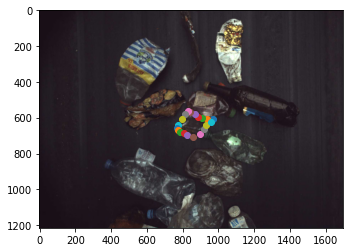

In [ ]:
x1, y1 = [968, 607], [938, 609]
x2, y2 = [906, 603], [886, 595]
x3, y3 = [869, 577], [844, 567]
x4, y4 = [833, 561], [812, 580]
x5, y5 = [796, 605], [775, 639]
x6, y6 = [771, 657], [776, 669]
x7, y7 = [788, 679], [807, 687]
x8, y8 = [826, 694], [859, 707]
x9, y9 = [896, 691], [920, 662]
x10, y10 = [929, 640], [959, 623]
# plt.plot(x1, y1, x2, y2, marker = 'o')
# plt.plot(x3, y3, x4, y4, marker = 'o')
# plt.plot(x5, y5, x6, y6, marker = 'o')
# plt.plot(x7, y7, x8, y8, marker = 'o')
# plt.plot(x9, y9, x10, y10, marker = 'o')
plt.scatter(968, 607)
plt.scatter(938, 609)
plt.scatter(906, 603)
plt.scatter(886, 595)
plt.scatter(869, 577)
plt.scatter(844, 567)
plt.scatter(833, 561)
plt.scatter(812, 580)
plt.scatter(796, 605)
plt.scatter(775, 639)
plt.scatter(771, 657)
plt.scatter(776, 669)
plt.scatter(788, 679)
plt.scatter(807, 687)
plt.scatter(826, 694)
plt.scatter(859, 707)
plt.scatter(896, 691)
plt.scatter(920, 662)
plt.scatter(929, 640)
plt.scatter(959, 623)
import matplotlib.cbook as cbook
# with cbook.get_sample_data('53b812a205144b49ba0d173b4fb49b64.jpg') as image_file:
image = plt.imread('53b812a205144b49ba0d173b4fb49b64.jpg')

plt.imshow(image)
plt.show()

In [ ]:
image = plt.imread('53b812a205144b49ba0d173b4fb49b64.jpg')
plt.imshow(image)
plt.show()

###Обработка координат

In [ ]:
y[0]

'[{"X":968,"Y":607},{"X":938,"Y":609},{"X":906,"Y":603},{"X":886,"Y":595},{"X":869,"Y":577},{"X":844,"Y":567},{"X":833,"Y":561},{"X":812,"Y":580},{"X":796,"Y":605},{"X":775,"Y":639},{"X":771,"Y":657},{"X":776,"Y":669},{"X":788,"Y":679},{"X":807,"Y":687},{"X":826,"Y":694},{"X":859,"Y":707},{"X":896,"Y":691},{"X":920,"Y":662},{"X":929,"Y":640},{"X":959,"Y":623}]'

In [ ]:
len(y[0])

361

In [ ]:
y[0][1]

'{'

In [ ]:
z =  y[0]

In [ ]:
z

'[{"X":968,"Y":607},{"X":938,"Y":609},{"X":906,"Y":603},{"X":886,"Y":595},{"X":869,"Y":577},{"X":844,"Y":567},{"X":833,"Y":561},{"X":812,"Y":580},{"X":796,"Y":605},{"X":775,"Y":639},{"X":771,"Y":657},{"X":776,"Y":669},{"X":788,"Y":679},{"X":807,"Y":687},{"X":826,"Y":694},{"X":859,"Y":707},{"X":896,"Y":691},{"X":920,"Y":662},{"X":929,"Y":640},{"X":959,"Y":623}]'

In [ ]:
z = z[2:359]

In [ ]:
z

'"X":968,"Y":607},{"X":938,"Y":609},{"X":906,"Y":603},{"X":886,"Y":595},{"X":869,"Y":577},{"X":844,"Y":567},{"X":833,"Y":561},{"X":812,"Y":580},{"X":796,"Y":605},{"X":775,"Y":639},{"X":771,"Y":657},{"X":776,"Y":669},{"X":788,"Y":679},{"X":807,"Y":687},{"X":826,"Y":694},{"X":859,"Y":707},{"X":896,"Y":691},{"X":920,"Y":662},{"X":929,"Y":640},{"X":959,"Y":623'

In [ ]:
z = z.split("},{")

In [ ]:
len(z)

20

In [ ]:
z

['"X":968,"Y":607',
 '"X":938,"Y":609',
 '"X":906,"Y":603',
 '"X":886,"Y":595',
 '"X":869,"Y":577',
 '"X":844,"Y":567',
 '"X":833,"Y":561',
 '"X":812,"Y":580',
 '"X":796,"Y":605',
 '"X":775,"Y":639',
 '"X":771,"Y":657',
 '"X":776,"Y":669',
 '"X":788,"Y":679',
 '"X":807,"Y":687',
 '"X":826,"Y":694',
 '"X":859,"Y":707',
 '"X":896,"Y":691',
 '"X":920,"Y":662',
 '"X":929,"Y":640',
 '"X":959,"Y":623']

In [ ]:
len(z[0])

15

In [ ]:
z = z[0].split(",")

In [ ]:
z

['"X":968', '"Y":607']

In [ ]:
len(z)

2

In [ ]:
z = z[0].split(":")

In [ ]:
z

['"X"', '968']

In [ ]:
z[1]

'968'

In [ ]:
sa = int(z[1])

In [ ]:
sa

968

In [ ]:
len(y)

12035

In [ ]:
arr = np.zeros((len(y), 4))

In [ ]:
arr[0][2] = 1700

In [ ]:
for i in range(len(y)):
  arr[i][2] = 1700
  arr[i][3] = 1300

In [ ]:
arr

array([[   0.,    0., 1700., 1300.],
       [   0.,    0., 1700., 1300.],
       [   0.,    0., 1700., 1300.],
       ...,
       [   0.,    0., 1700., 1300.],
       [   0.,    0., 1700., 1300.],
       [   0.,    0., 1700., 1300.]])

In [ ]:
def coord(y, arr):
  ss = 0
  for i in range(len(y)):
    z = y[i]
    z = z[2: len(y[i]) - 2]
    z = z.split("},{")
    for j in range(len(z)):
      tmp = z[j].split(",")
      tmp_1 = tmp[0].split(":")
      tmp_2 = tmp[1].split(":")
      x = int(tmp_1[1])
      cord_y = int(tmp_2[1])
      if x > arr[i][0]:
        arr[i][0] = x
      if x < arr[i][2]:
        arr[i][2] = x
      if cord_y > arr[i][1]:
        arr[i][1] = cord_y
      if cord_y < arr[i][3]:
        arr[i][3] = cord_y
      ss += 1
  return arr, ss

In [ ]:
aray, ss = coord(y, arr)

In [ ]:
len(y[0])

361

In [ ]:
aray

array([[ 968.,  707.,  771.,  561.],
       [1456.,  654.,  913.,  398.],
       [1100.,  606.,  820.,  451.],
       ...,
       [ 471., 1063.,  127.,  720.],
       [ 585.,  345.,  256.,   84.],
       [1203.,  247., 1014.,    0.]])

In [ ]:
ss

324352

In [ ]:
pic = data['ImageFileName']

In [ ]:
pic

0        53b812a205144b49ba0d173b4fb49b64.raw
1        53b812a205144b49ba0d173b4fb49b64.raw
2        53b812a205144b49ba0d173b4fb49b64.raw
3        53b812a205144b49ba0d173b4fb49b64.raw
4        53b812a205144b49ba0d173b4fb49b64.raw
                         ...                 
12030    81f99790c0f54011bbdc75203aa2edf7.raw
12031    81f99790c0f54011bbdc75203aa2edf7.raw
12032    81f99790c0f54011bbdc75203aa2edf7.raw
12033    81f99790c0f54011bbdc75203aa2edf7.raw
12034    81f99790c0f54011bbdc75203aa2edf7.raw
Name: ImageFileName, Length: 12035, dtype: object

In [ ]:
len(pic[0])

36

In [ ]:
def pictures(pic):
  new = 'jpg'
  for i in range(len(pic)):
    pic[i] = pic[i][:len(pic[i]) - 3] + new
    # pic[i] = pic[i] + new
  return pic

In [ ]:
pic = pictures(pic)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
pic[i][len(pic[i]) - 3]

'j'

In [ ]:
pic

0        53b812a205144b49ba0d173b4fb49b64.jpg
1        53b812a205144b49ba0d173b4fb49b64.jpg
2        53b812a205144b49ba0d173b4fb49b64.jpg
3        53b812a205144b49ba0d173b4fb49b64.jpg
4        53b812a205144b49ba0d173b4fb49b64.jpg
                         ...                 
12030    81f99790c0f54011bbdc75203aa2edf7.jpg
12031    81f99790c0f54011bbdc75203aa2edf7.jpg
12032    81f99790c0f54011bbdc75203aa2edf7.jpg
12033    81f99790c0f54011bbdc75203aa2edf7.jpg
12034    81f99790c0f54011bbdc75203aa2edf7.jpg
Name: ImageFileName, Length: 12035, dtype: object

In [ ]:
from PIL import Image

In [ ]:
# im = Image.open('53b812a205144b49ba0d173b4fb49b64.jpg')
# im_crop = im.crop((aray[0][2], aray[0][3], aray[0][0], aray[0][1]))
# im_crop.save('sam/53b812a205144b49ba0d173b4fb49b64.jpg', quality=95)

In [ ]:
# mmdetection
# YOLOv3
# SSD

### Using Model

In [ ]:
  import os, time, random
import numpy as np
import pandas as pd
import cv2, torch
from tqdm.auto import tqdm
import shutil as sh

from IPython.display import Image, clear_output
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
%%time

!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -U pycocotools
!pip install -qr yolov5/requirements.txt  # install dependencies
!cp yolov5/requirements.txt ./

Cloning into 'yolov5'...
remote: Enumerating objects: 12390, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 12390 (delta 1), reused 7 (delta 1), pack-reused 12383
Receiving objects: 100% (12390/12390), 11.51 MiB | 29.84 MiB/s, done.
Resolving deltas: 100% (8622/8622), done.
     |████████████████████████████████| 596 kB 5.3 MB/s 
CPU times: user 150 ms, sys: 74.7 ms, total: 225 ms
Wall time: 12.6 s


In [ ]:
pic

0        53b812a205144b49ba0d173b4fb49b64.jpg
1        53b812a205144b49ba0d173b4fb49b64.jpg
2        53b812a205144b49ba0d173b4fb49b64.jpg
3        53b812a205144b49ba0d173b4fb49b64.jpg
4        53b812a205144b49ba0d173b4fb49b64.jpg
                         ...                 
12030    81f99790c0f54011bbdc75203aa2edf7.jpg
12031    81f99790c0f54011bbdc75203aa2edf7.jpg
12032    81f99790c0f54011bbdc75203aa2edf7.jpg
12033    81f99790c0f54011bbdc75203aa2edf7.jpg
12034    81f99790c0f54011bbdc75203aa2edf7.jpg
Name: ImageFileName, Length: 12035, dtype: object

In [ ]:
df1 = pd.DataFrame(pic)
df2 = pd.DataFrame(aray)

In [ ]:
df = pd.concat([df1, df2], axis=1)

In [ ]:
df = df.rename(columns={0: 'xmax', 1: 'ymax', 2: 'xmin', 3: 'ymin'})

In [ ]:
df

,ImageFileName,xmax,ymax,xmin,ymin
0,53b812a205144b49ba0d173b4fb49b64.jpg,968.0,707.0,771.0,561.0
1,53b812a205144b49ba0d173b4fb49b64.jpg,1456.0,654.0,913.0,398.0
2,53b812a205144b49ba0d173b4fb49b64.jpg,1100.0,606.0,820.0,451.0
3,53b812a205144b49ba0d173b4fb49b64.jpg,1271.0,869.0,914.0,668.0
4,53b812a205144b49ba0d173b4fb49b64.jpg,1138.0,1052.0,809.0,768.0
...,...,...,...,...,...
12030,81f99790c0f54011bbdc75203aa2edf7.jpg,471.0,49.0,329.0,0.0
12031,81f99790c0f54011bbdc75203aa2edf7.jpg,287.0,156.0,60.0,4.0
12032,81f99790c0f54011bbdc75203aa2edf7.jpg,471.0,1063.0,127.0,720.0
12033,81f99790c0f54011bbdc75203aa2edf7.jpg,585.0,345.0,256.0,84.0


In [ ]:
df['x_center'] = (df['xmin'] + df['xmax'])/2

In [ ]:
img_h, img_w, num_channels = (1216, 1696, 3)
df['y_center'] = (df['ymin'] + df['ymax'])/2
df['w'] = df['xmax'] - df['xmin']
df['h'] = df['ymax'] - df['ymin']
# df['classes'] = data['Answer']
df['classes'] = 0
df['x_center'] = df['x_center']/img_w
df['w'] = df['w']/img_w
df['y_center'] = df['y_center']/img_h
df['h'] = df['h']/img_h
df.head()

,ImageFileName,xmax,ymax,xmin,ymin,x_center,y_center,w,h,classes
0,53b812a205144b49ba0d173b4fb49b64.jpg,968.0,707.0,771.0,561.0,0.512677,0.521382,0.116156,0.120066,0
1,53b812a205144b49ba0d173b4fb49b64.jpg,1456.0,654.0,913.0,398.0,0.698408,0.432566,0.320165,0.210526,0
2,53b812a205144b49ba0d173b4fb49b64.jpg,1100.0,606.0,820.0,451.0,0.566038,0.434622,0.165094,0.127467,0
3,53b812a205144b49ba0d173b4fb49b64.jpg,1271.0,869.0,914.0,668.0,0.644163,0.631990,0.210495,0.165296,0
4,53b812a205144b49ba0d173b4fb49b64.jpg,1138.0,1052.0,809.0,768.0,0.573998,0.748355,0.193986,0.233553,0


In [ ]:
df

,ImageFileName,xmax,ymax,xmin,ymin,x_center,y_center,w,h,classes
0,53b812a205144b49ba0d173b4fb49b64.jpg,968.0,707.0,771.0,561.0,0.512677,0.521382,0.116156,0.120066,0
1,53b812a205144b49ba0d173b4fb49b64.jpg,1456.0,654.0,913.0,398.0,0.698408,0.432566,0.320165,0.210526,0
2,53b812a205144b49ba0d173b4fb49b64.jpg,1100.0,606.0,820.0,451.0,0.566038,0.434622,0.165094,0.127467,0
3,53b812a205144b49ba0d173b4fb49b64.jpg,1271.0,869.0,914.0,668.0,0.644163,0.631990,0.210495,0.165296,0
4,53b812a205144b49ba0d173b4fb49b64.jpg,1138.0,1052.0,809.0,768.0,0.573998,0.748355,0.193986,0.233553,0
...,...,...,...,...,...,...,...,...,...,...
12030,81f99790c0f54011bbdc75203aa2edf7.jpg,471.0,49.0,329.0,0.0,0.235849,0.020148,0.083726,0.040296,0
12031,81f99790c0f54011bbdc75203aa2edf7.jpg,287.0,156.0,60.0,4.0,0.102300,0.065789,0.133844,0.125000,0
12032,81f99790c0f54011bbdc75203aa2edf7.jpg,471.0,1063.0,127.0,720.0,0.176297,0.733141,0.202830,0.282072,0
12033,81f99790c0f54011bbdc75203aa2edf7.jpg,585.0,345.0,256.0,84.0,0.247936,0.176398,0.193986,0.214638,0


In [ ]:
! unzip ./drive/MyDrive/vvv/ecoline.zip 

Archive:  ./drive/MyDrive/vvv/ecoline.zip
  inflating: 001cc7f66f994e2f875490802e49a579.jpg  
  inflating: 001cc7f66f994e2f875490802e49a579.raw  
  inflating: 004f9110946b4c018ea4347d8d569fa5.jpg  
  inflating: 004f9110946b4c018ea4347d8d569fa5.raw  
  inflating: 00551392c98e412cb9facb545ab29278.jpg  
  inflating: 00551392c98e412cb9facb545ab29278.raw  
  inflating: 007a820dca9b442a9d4b27e67634e3cb.jpg  
  inflating: 007a820dca9b442a9d4b27e67634e3cb.raw  
  inflating: 00809adaa33c4c3ebe6e12e542b02843.jpg  
  inflating: 00809adaa33c4c3ebe6e12e542b02843.raw  
  inflating: 00a1a8b2772449d3afaee4ace8921c54.jpg  
  inflating: 00a1a8b2772449d3afaee4ace8921c54.raw  
  inflating: 00b5e587f3d64495aad7c449c33909a6.jpg  
  inflating: 00b5e587f3d64495aad7c449c33909a6.raw  
  inflating: 00c998833af04911af49cbcc600d9a6b.jpg  
  inflating: 00c998833af04911af49cbcc600d9a6b.raw  
  inflating: 00e0927ac3204dc8b1ecaf66dc07a740.jpg  
  inflating: 00e0927ac3204dc8b1ecaf66dc07a740.raw  
  inflating: 0100d0d19

In [ ]:
index = list(set(df.ImageFileName))
image = random.choice(index)
print("Image ID: %s"%(image))
img = cv2.imread(f'{image}')
img.shape
# img

Image ID: 0b67e309138a4e3993f5557c97fcdb34.jpg


(1216, 1696, 3)

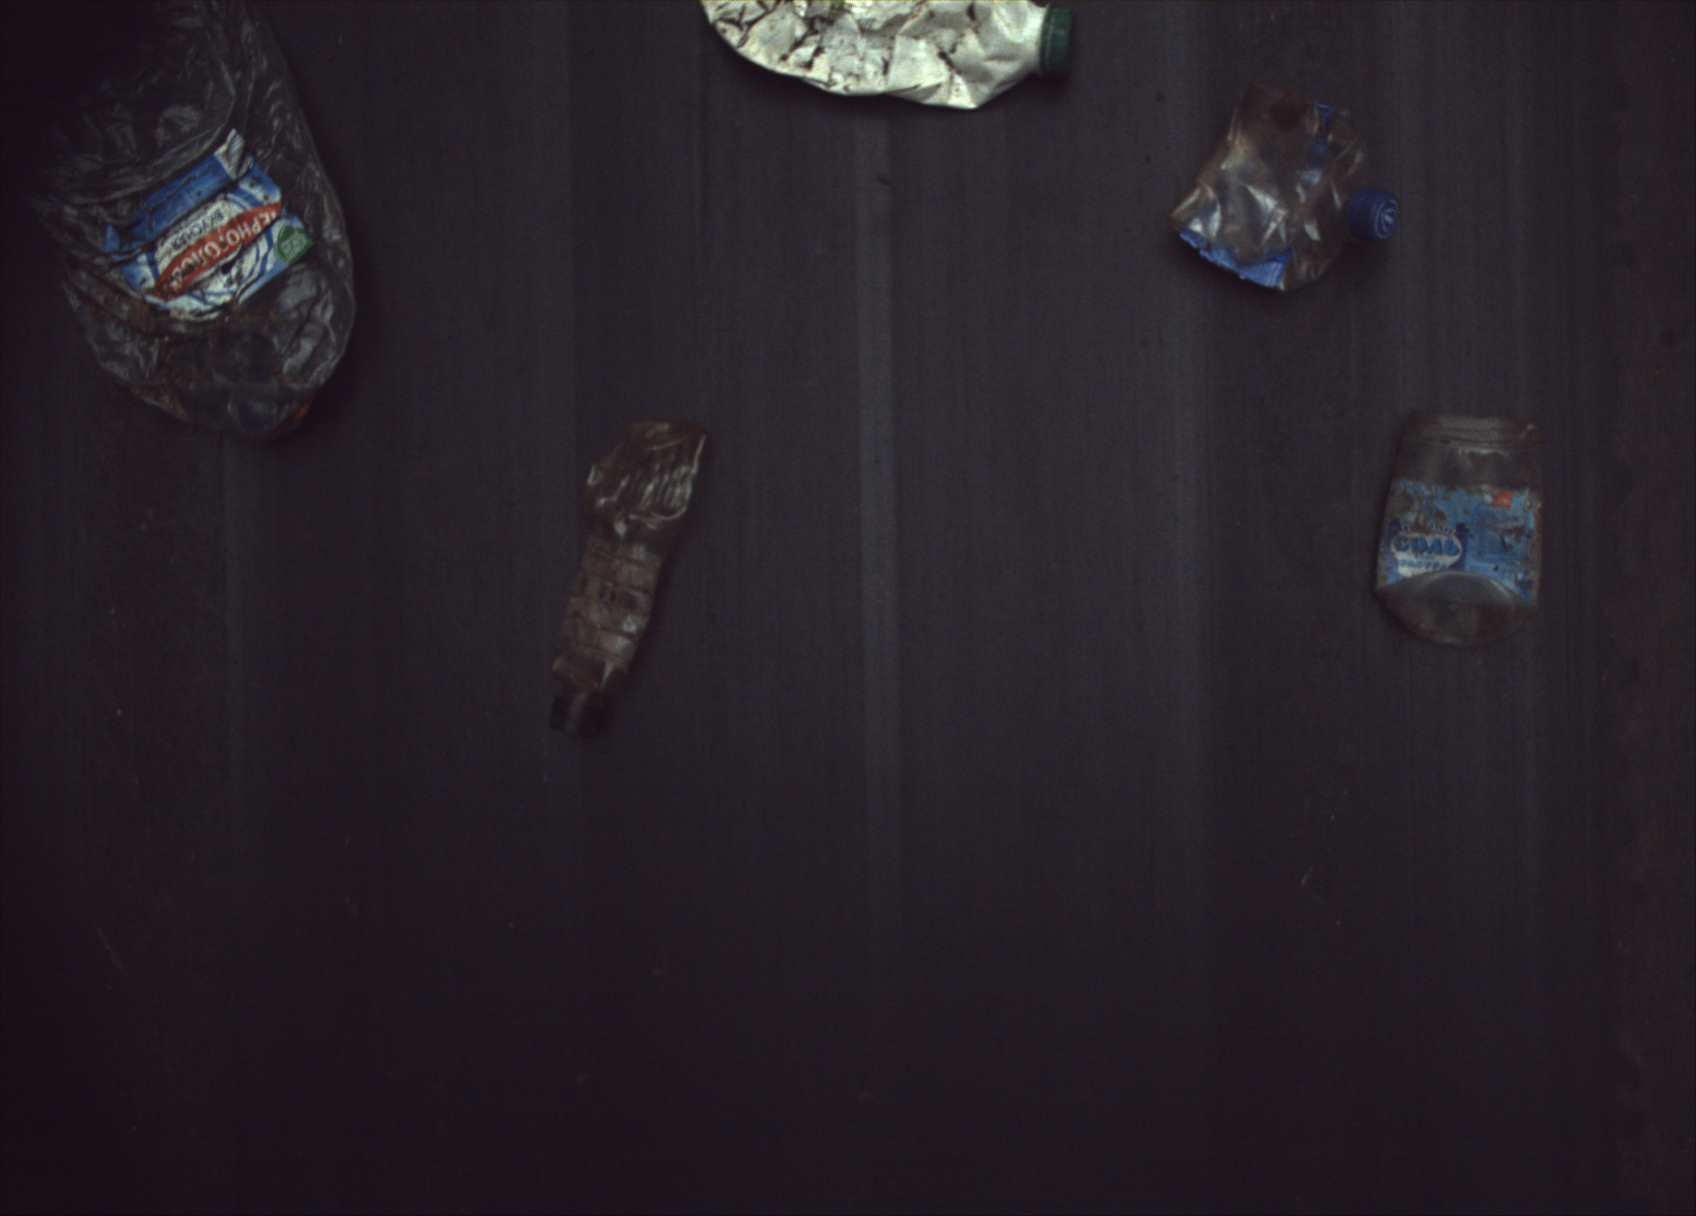

In [ ]:
image = random.choice(index)
Image(filename=f'{image}',width=600)

In [ ]:
source = 'training_images'
if True:
    for fold in [0]:
        val_index = index[len(index)*fold//5:len(index)*(fold+1)//5]
        for name,mini in tqdm(df.groupby('ImageFileName')):
            if name in val_index:
                path2save = 'val2017/'
            else:
                path2save = 'train2017/'
            if not os.path.exists('/convertor/fold{}/labels/'.format(fold)+path2save):
                os.makedirs('/convertor/fold{}/labels/'.format(fold)+path2save)
            with open('/convertor/fold{}/labels/'.format(fold)+path2save+name+".txt", 'w+') as f:
                row = mini[['classes','x_center','y_center','w','h']].astype(float).values
                row = row.astype(str)
                for j in range(len(row)):
                    text = ' '.join(row[j])
                    f.write(text)
                    f.write("\n")
            if not os.path.exists('/convertor/fold{}/images/{}'.format(fold,path2save)):
                os.makedirs('/convertor/fold{}/images/{}'.format(fold,path2save))
            # sh.copy("/kaggle/input/car-object-detection/data/{}/{}".format(source,name),'/tmp/convertor/fold{}/images/{}/{}'.format(fold,path2save,name))

  0%|          | 0/1077 [00:00<?, ?it/s]

In [ ]:
!python yolov5/detect.py --weights yolov5/yolov5s.pt --img 1696 --conf 0.4 --source .

detect: weights=['yolov5/yolov5s.pt'], source=., data=yolov5/data/coco128.yaml, imgsz=[1696, 1696], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-82-g71621df torch 1.10.0+cu111 CPU

100% 14.1M/14.1M [00:00<00:00, 73.2MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
image 1/1627 /content/001cc7f66f994e2f875490802e49a579.jpg: 1216x1696 Done. (4.486s)
image 2/1627 /content/004f9110946b4c018ea4347d8d569fa5.jpg: 1216x1696 Done. (4.415s)
image 3/1627 /content/00551392c98e412cb9facb545ab29278.jpg: 1216x1696 1 vase, Done. (4.545s)
image 4/1627 /content/007a820dca9b442a9d4b27e67634e3cb.jpg: 1216x1696 1 skateboard, Done. (3.298s)
image 5/1

In [ ]:
predicted_files = []
for (dirpath, dirnames, filenames) in os.walk("./yolov5/runs/detect/exp"):
    predicted_files.extend(filenames)

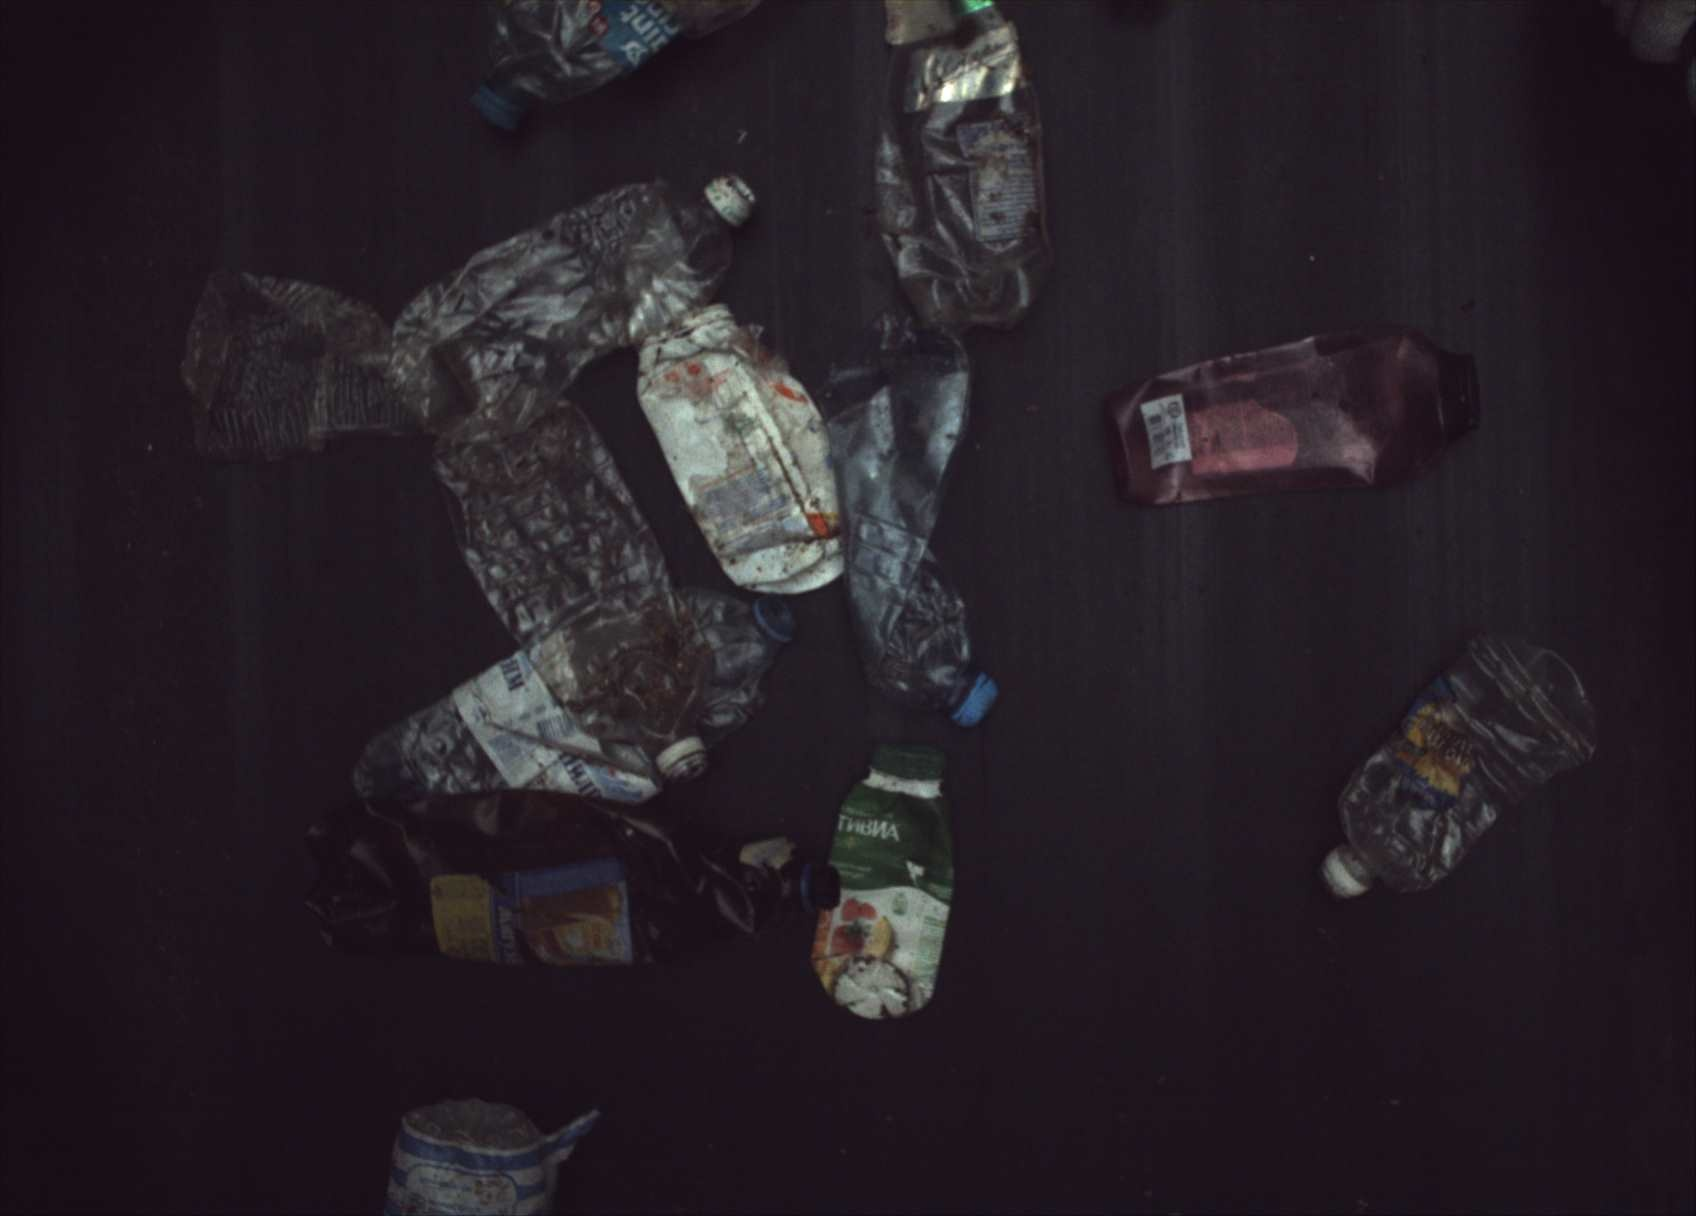

In [ ]:
Image(filename=f'./yolov5/runs/detect/exp/{random.choice(predicted_files)}')

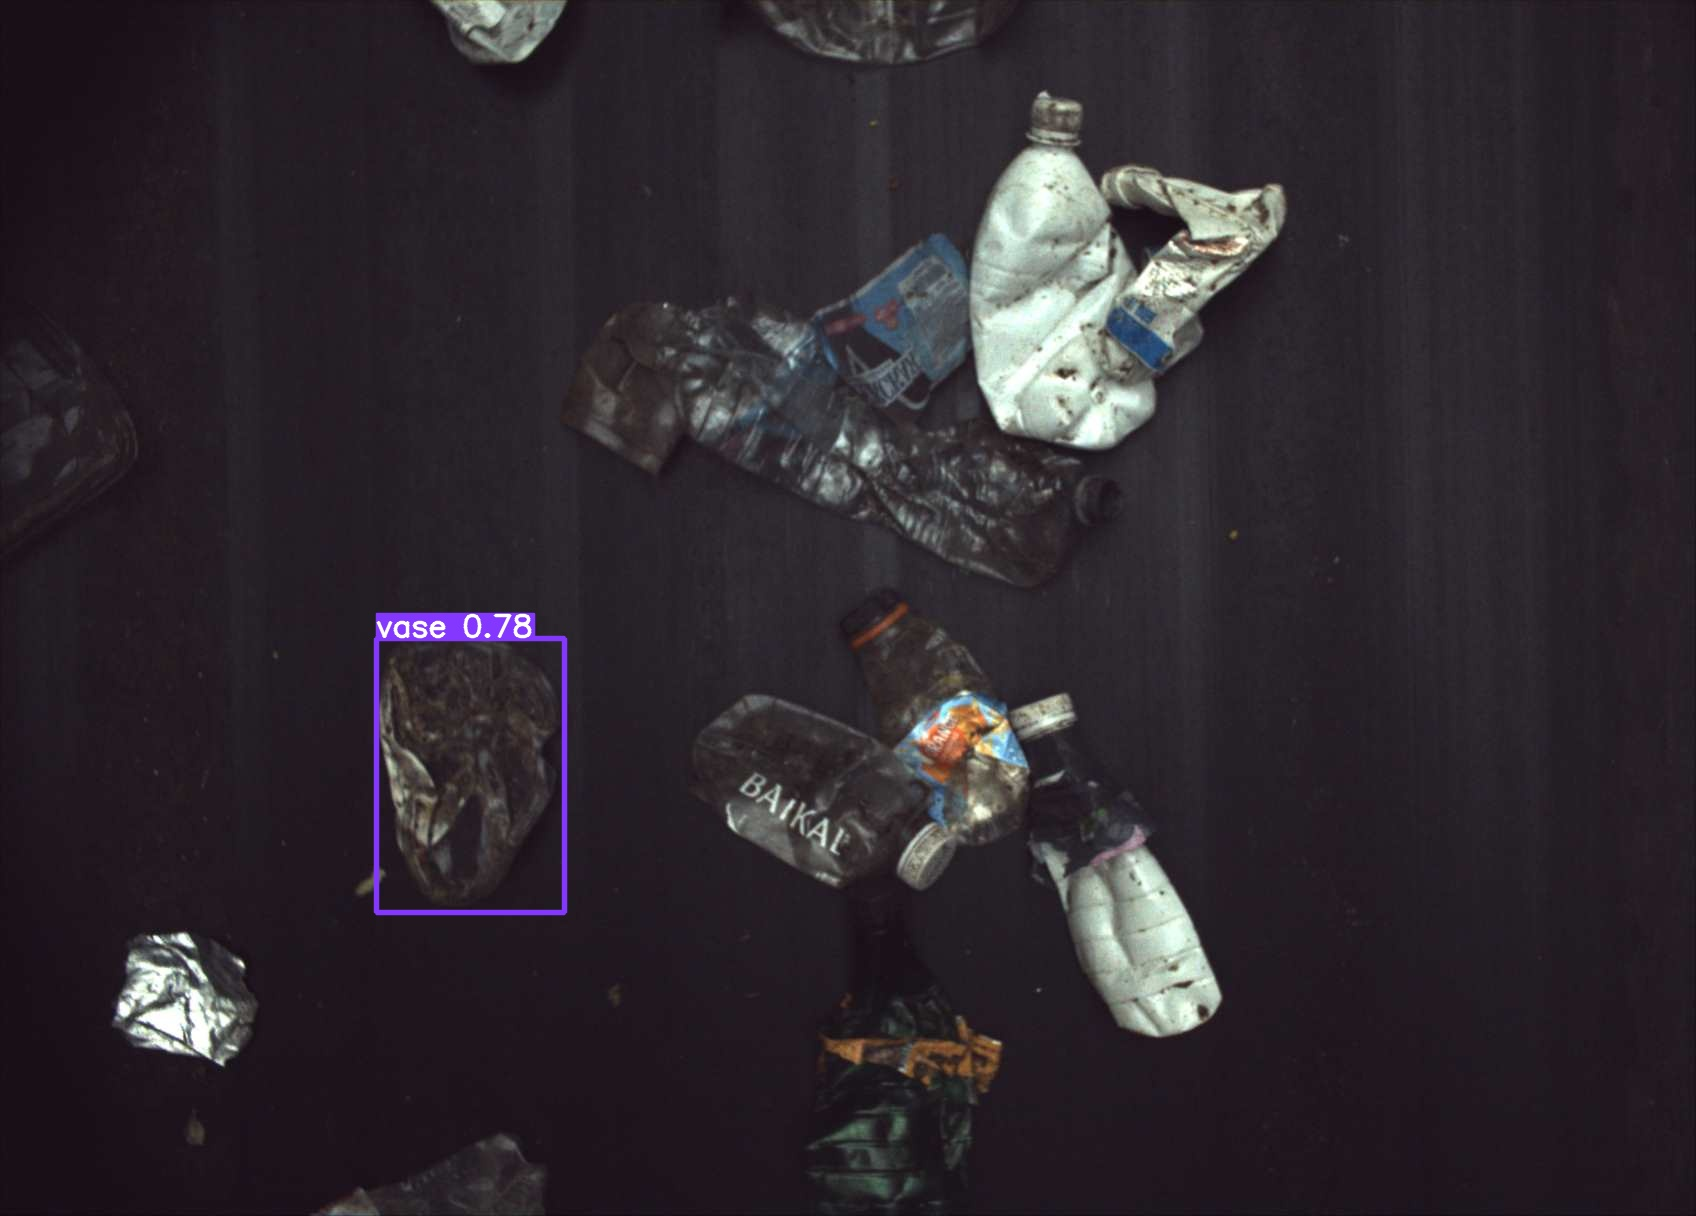

In [ ]:
Image(filename=f'./yolov5/runs/detect/exp/{random.choice(predicted_files)}')

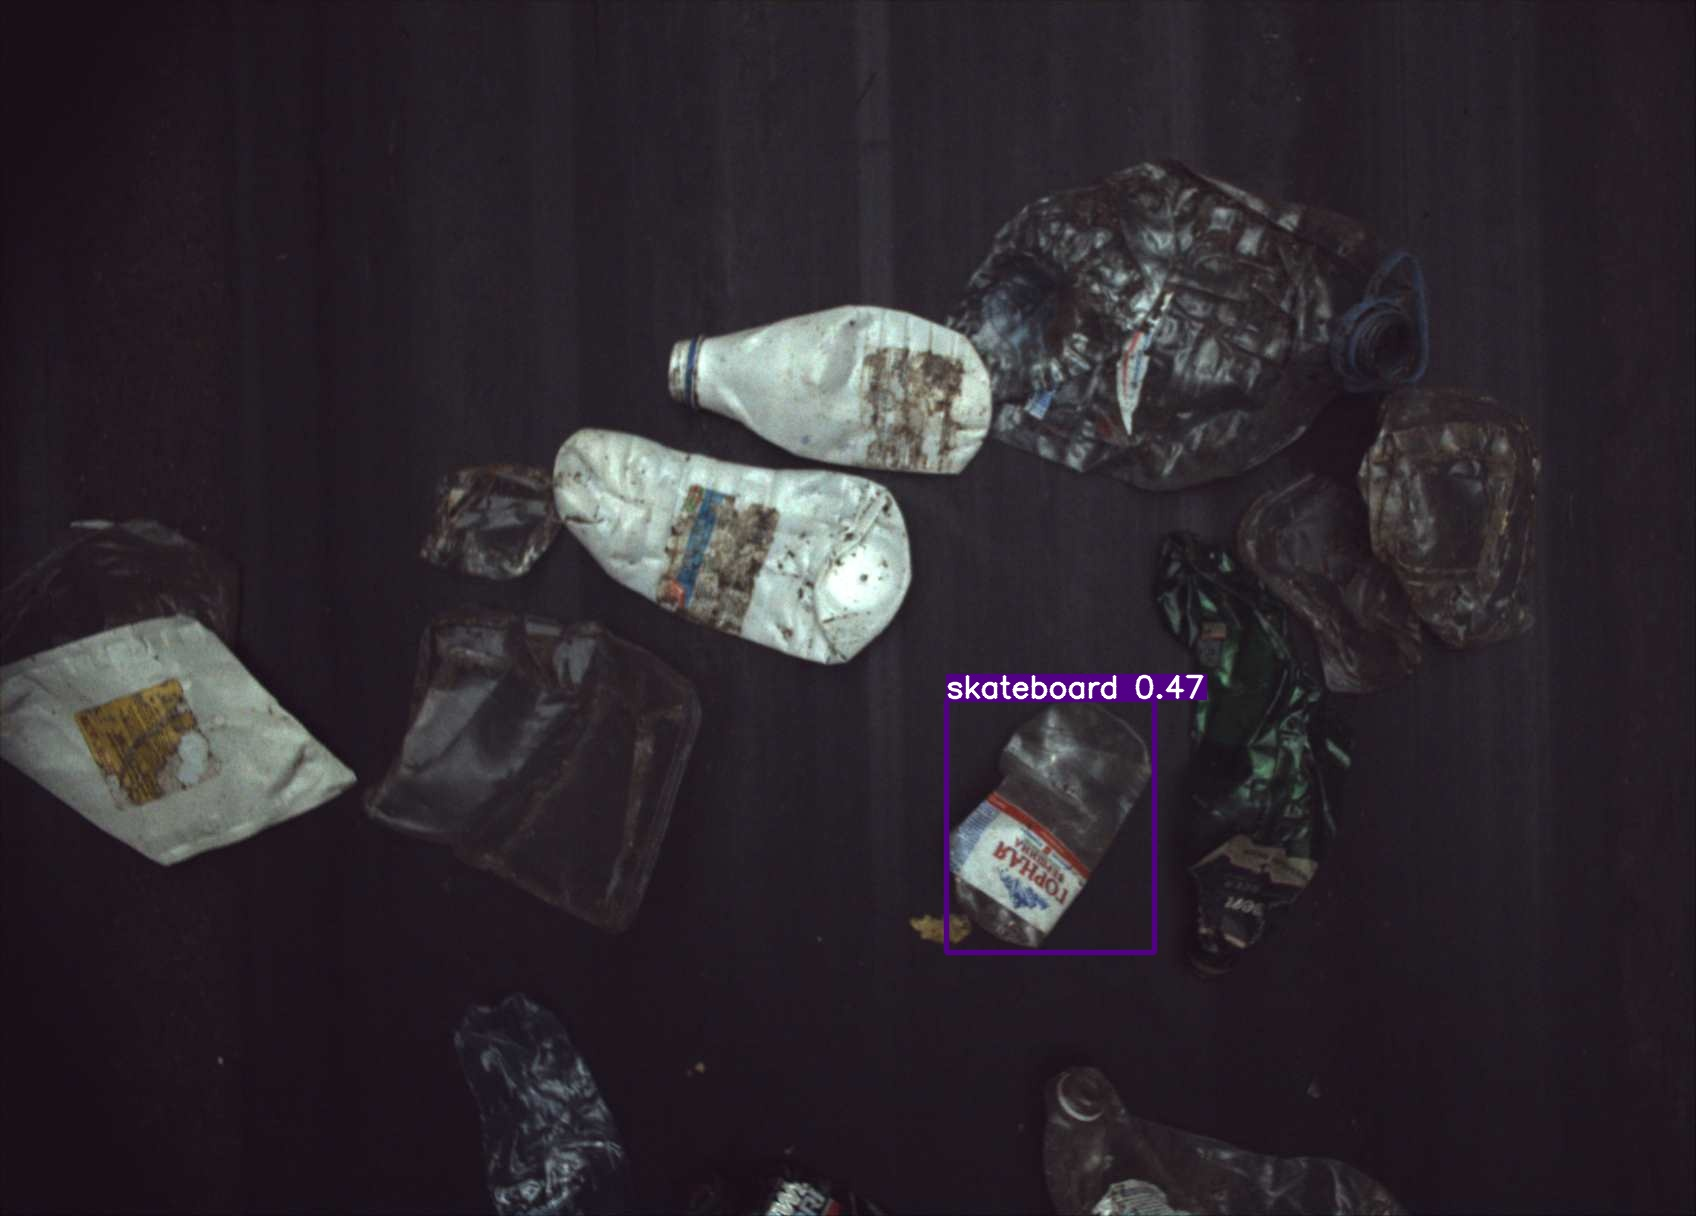

In [ ]:
Image(filename=f'./yolov5/runs/detect/exp/007a820dca9b442a9d4b27e67634e3cb.jpg')

In [ ]:
Image(filename=f'./yolov5/runs/detect/exp/53b812a205144b49ba0d173b4fb49b64.jpg')

FileNotFoundError: ignored

In [ ]:
!python yolov5/train.py --img 1696 --batch 4 --epochs 3 --data coco128.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=3, batch_size=4, imgsz=1696, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-82-g71621df torch 1.10.0+cu111 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0

In [ ]:
%cd datasets/
%mkdir eco
%cd eco
%mkdir images labels
%cd images
%mkdir train val
%cd ..
%cd labels
%mkdir train val

In [ ]:
!pwd

In [ ]:
%cd ..

In [ ]:
%cd images

In [ ]:
%cd train

In [ ]:
!unzip ./drive/MyDrive/vvv/ecoline.zip /content/datasets/eco/images/train

In [ ]:
df['classes'] = data['Answer']
df

In [ ]:
d = {'Ничего из вышеперечисленного': 0, 'ПЭТ коричневый': 1, 'ПЭТ прозрачный': 2, 'ПЭТ зеленый': 3, 'NaN': 4, 'ПЭТ масло': 5, 'ПЭТ молочка (белая/прозрачная)': 6,
     'ПЭТ голубой': 7, 'Одноразовая посуда (пластик)': 8, 'Любая бутылка с термоусадкой': 9, 'Бутылка Бытовая химия': 10, 'Черные металлы': 11, 'Пленка (пакеты/стретч) белая/прозрачная': 12, 'Тэтрапак': 13, 'ПЭТ бирюзовый': 14, 
     'Пленка (пакеты/стретч) цветная': 15, 'ПЭТ остальные цвета': 16, 'Алюминий': 17}

In [ ]:
d

In [ ]:
df = df.replace({'classes' : d})

In [ ]:
df

In [ ]:
df[np.isnan(df['classes'])]

In [ ]:
data.head(10)

In [ ]:
plt.figure(figsize=(16,16))
plt.scatter(213,720)
plt.scatter(316,785)
plt.scatter(369,827)
plt.scatter(886, 595)
plt.scatter(411,867)
plt.scatter(449,931)
plt.scatter(471,965)
plt.scatter(451,998)
plt.scatter(436,1016)
plt.scatter(447,1043)
plt.scatter(422,1063)
plt.scatter(400,1060)
plt.scatter(367,1049)
plt.scatter(336,1054)
plt.scatter(262,1000)

plt.scatter(236,940)

plt.scatter(189,907)

plt.scatter(142,860)

plt.scatter(127,809)
plt.scatter(133,767)
plt.scatter(178,742)
import matplotlib.cbook as cbook
# with cbook.get_sample_data('53b812a205144b49ba0d173b4fb49b64.jpg') as image_file:
image = plt.imread('81f99790c0f54011bbdc75203aa2edf7.jpg')


plt.imshow(image)
plt.show()

In [ ]:
wq = y[38].split('},{')

In [ ]:
wq[0] = wq[0][2:]

In [ ]:
len(wq)

In [ ]:
wq[23] = wq[23][0: len(wq[23]) - 2]

In [ ]:
wq

In [ ]:
zx = np.zeros((len(wq), 2))

In [ ]:
mn = wq[0].split(',')
mn[0] = mn[0].split('"X":')
mn[1] = mn[1].split('"Y":')
mn
for i in range(len(wq)):
  mn = wq[i].split(',')
  mn[0] = mn[0].split('"X":')
  mn[1] = mn[1].split('"Y":')
  zx[i][0] = int(mn[0][1])
  zx[i][1] = int(mn[1][1])
zx

In [ ]:
plt.figure(figsize=(16,16))
for i in range(len(zx)):
  plt.scatter(zx[i][0],zx[i][1])

import matplotlib.cbook as cbook
image = plt.imread('e170f9e66afc436397a12fbac8737098.jpg')


plt.imshow(image)
plt.show()

In [ ]:
data.head(40)

In [ ]:
df1 = df[~np.isnan(df['classes'])]

In [ ]:
df1.head(100)

,ImageFileName,xmax,ymax,xmin,ymin,x_center,y_center,w,h,classes
0,53b812a205144b49ba0d173b4fb49b64.jpg,968.0,707.0,771.0,561.0,0.512677,0.521382,0.116156,0.120066,0
1,53b812a205144b49ba0d173b4fb49b64.jpg,1456.0,654.0,913.0,398.0,0.698408,0.432566,0.320165,0.210526,0
2,53b812a205144b49ba0d173b4fb49b64.jpg,1100.0,606.0,820.0,451.0,0.566038,0.434622,0.165094,0.127467,0
3,53b812a205144b49ba0d173b4fb49b64.jpg,1271.0,869.0,914.0,668.0,0.644163,0.631990,0.210495,0.165296,0
4,53b812a205144b49ba0d173b4fb49b64.jpg,1138.0,1052.0,809.0,768.0,0.573998,0.748355,0.193986,0.233553,0
...,...,...,...,...,...,...,...,...,...,...
95,73ef2de24f944cf09e2816a8239d2808.jpg,485.0,926.0,21.0,730.0,0.149175,0.680921,0.273585,0.161184,0
96,73ef2de24f944cf09e2816a8239d2808.jpg,373.0,1143.0,174.0,896.0,0.161262,0.838405,0.117335,0.203125,0
97,eabe144ae0ea44009b874ddd892da030.jpg,1233.0,173.0,798.0,1.0,0.598762,0.071546,0.256486,0.141447,0
98,eabe144ae0ea44009b874ddd892da030.jpg,1302.0,721.0,956.0,410.0,0.665684,0.465049,0.204009,0.255757,0


In [ ]:
%cd drive
%cd MyDrive
%cd vvv
%mkdir ll